In [1]:
# Implementasi fungsi ConvexHull buatan sendiri: myConvexHull
# 13520127 Adzka Ahmadetya Zaidan

import numpy as np

# Menghitung jarak dari 2 titik
def Distance(p1, p2):
    return float(np.sqrt((p1[0] - p2[0])**2 + (p1[1] - p2[1])**2))

# Menghitung jarak suatu titik ke suatu garis yang dibuat dari 2 titik: start hingga end
def DistToLine(start, end, point):
    start = np.array(start)
    end = np.array(end)
    point = np.array(point)
    return np.cross(end-start,point-start)/np.linalg.norm(end-start)

# Menghitung nilai determinan dari 3 titik p1, p2, dan p3
#  p1 = (x1, y1); p2 = (x2, y2); p3 = (x3, y3)
# | x1 y1 1 |
# | x2 y2 1 |
# | x3 y3 1 |
def DetConvexHull(p1, p2, p3):
    return (p1[0]*p2[1]+p3[0]*p1[1]+p2[0]*p3[1]-p3[0]*p2[1]-p2[0]*p1[1]-p1[0]*p3[1])

# Fungsi untuk mencari titik terjauh dari garis yang dibentuk dari titik start dan end,
# sekaligus menambahkan titik tersebut ke array hull
def FindFurthest(hull, start, end, possibleCoords):
    if (len(possibleCoords) == 0): # Basis 0
        return
    elif (len(possibleCoords) == 1): # Basis 1
        hull.append(possibleCoords[0])
        return
    else:
        # Cari titik terjauh dari garis
        maxDist = 0
        maxIdx = 0
        # Mencari index terjauh dari garis
        for i in range(len(possibleCoords)):
            dist = DistToLine(start, end, possibleCoords[i])
            if dist > maxDist:
                maxDist = dist
                maxIdx = i
        
        # Merekursif bagian kiri dari garis
        # yang dibentuk dari titik start hingga titik terjauh
        coords1 = []
        for i in range(len(possibleCoords)):
            detTemp = DetConvexHull(start, possibleCoords[maxIdx], possibleCoords[i])
            if detTemp > 0:
                coords1.append(possibleCoords[i])
        if len(coords1) > 0:
            FindFurthest(hull, start, possibleCoords[maxIdx], coords1)
            
        hull.append(possibleCoords[maxIdx])
        
        # Merekursif bagian kanan dari garis
        # yang dibentuk dari titik start hingga titik terjauh
        coords2 = []
        for i in range(len(possibleCoords)):
            detTemp = DetConvexHull(possibleCoords[maxIdx], end, possibleCoords[i])
            if detTemp > 0:
                coords2.append(possibleCoords[i])
        if len(coords2) > 0:
            FindFurthest(hull, possibleCoords[maxIdx], end, coords2)
        return

# Fungsi yang menerima kumpulan data titik 2 dimensi
# Mengembalikan titik 2 dimensi dari data tersebut yang membentuk poligon convex
def myConvexHull(coords):
    hull = []
    
    # Melakukan sorting titik berdasarkan x-axisnya
    coords = sorted(coords , key=lambda k: [k[0], k[1]])
    coords = np.array(coords)

    # Membagi 2 array titik menjadi array di kanan dan di kiri berdasarkan garis
    # Pembelahan dilakukan di titik dengan x terkecil dan titik dengan x terbesar
    start = coords[0]
    end = coords[-1]

    coordsLeft = []
    coordsRight = []
    for i in range(len(coords)):
        detTemp = DetConvexHull(start, end, coords[i])
        if detTemp > 0:
            coordsLeft.append(coords[i])
        if detTemp < 0:
            coordsRight.append(coords[i])
    
    hull.append(start)
    
    # Cari titik terjauh dari garis di bagian kiri secara rekursif
    FindFurthest(hull, start, end, coordsLeft)
    
    hull.append(end)
    
    # Cari titik terjauh dari garis di bagian kanan secara rekursif
    FindFurthest(hull, end, start, coordsRight)
    
    #hull.append(start)
    
    # Jika hanya garis yang dapat terbentuk, maka bidang bukan convex hull
    # mengembalikan array kosong
    if len(coordsRight) == 0 and len(coordsLeft) == 0:
        return np.array([])
    
    return np.array(hull)

In [2]:
# Importing libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets

In [3]:
data = datasets.load_iris() # Diganti sesuai dataset yang ingin digunakan

#create a DataFrame
df = pd.DataFrame(data.data, columns=data.feature_names)
df['Target'] = pd.DataFrame(data.target)
print(df.shape)
df.head()

(150, 5)


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


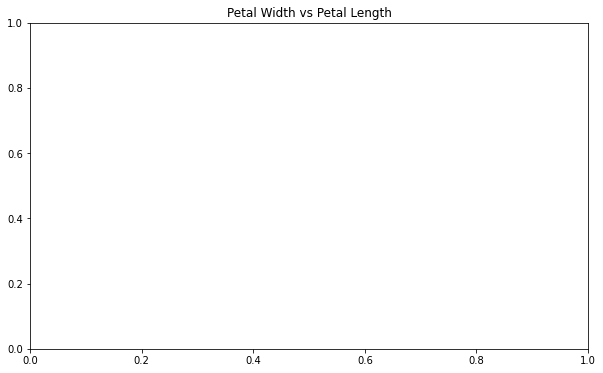

In [4]:
# INPUT Attribute Index dan title graph yang sesuai
plt.figure(figsize = (10, 6))
plt.title('Petal Width vs Petal Length') # Diganti sesuai label atribut
attributeIdx1 = 2 # Diganti sesuai index atribut
attributeIdx2 = 3 # Diganti sesuai index atribut

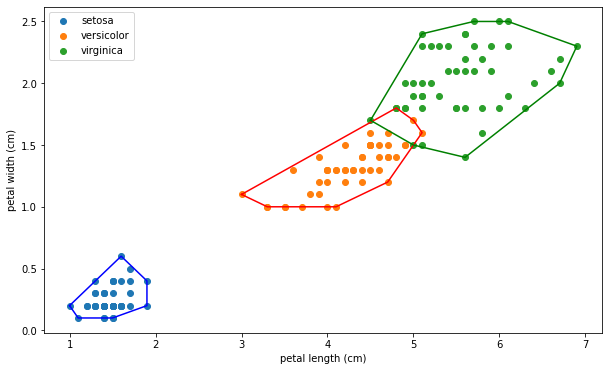

In [5]:
#visualisasi hasil ConvexHull
plt.figure(figsize = (10, 6))
colors = ['b','r','g', 'c', 'm', 'y', 'k']
plt.xlabel(data.feature_names[attributeIdx1])
plt.ylabel(data.feature_names[attributeIdx2])
for i in range(len(data.target_names)):
    bucket = df[df['Target'] == i]
    bucket = bucket.iloc[:,[attributeIdx1,attributeIdx2]].values
    hull = myConvexHull(bucket) #bagian ini diganti dengan hasil implementasi ConvexHull Divide & Conquer
    plt.scatter(bucket[:, 0], bucket[:, 1], label=data.target_names[i])
    x = []
    y = []
    for j in range(len(hull)):
        x.append(hull[j][0])
        y.append(hull[j][1])
    if len(hull) > 0:
        x.append(hull[0][0])
        y.append(hull[0][1])
    plt.plot(x, y, colors[i])
    
plt.legend()